In [13]:
import sys
sys.path.append("/content/AU23_Plantes")

# Importation des fonctions
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.visualization.eda import *


In [14]:
# Dataset path definition
base_path = '/content/dataset'

# Load the data
classes, image_paths, image_shapes, class_distribution, total_images = load_and_preprocess_data(base_path)

# Create the DataFrame
data_df = create_dataframe(classes, image_paths, image_shapes)

# Numeric visualization of our dataset
print(f"Total number of images: {total_images}")
print(f"Number of classes: {len(classes)}")
print(f"Class distribution: {class_distribution}")

Total number of images: 5539
Number of classes: 12
Class distribution: {'Scentless Mayweed': 607, 'Common wheat': 253, 'Fat Hen': 538, 'Sugar beet': 463, "Shepherd's Purse": 274, 'Charlock': 452, 'Common Chickweed': 713, 'Black-grass': 309, 'Loose Silky-bent': 762, 'Cleavers': 335, 'Maize': 257, 'Small-flowered Cranesbill': 576}


In [15]:
# Display DataFrame and its statistics
display(data_df.head())
display(data_df.info())
display(data_df.describe())

Class Filename                                        Path  \
0  Scentless Mayweed  324.png  /content/dataset/Scentless Mayweed/324.png   
1  Scentless Mayweed  332.png  /content/dataset/Scentless Mayweed/332.png   
2  Scentless Mayweed  606.png  /content/dataset/Scentless Mayweed/606.png   
3  Scentless Mayweed  198.png  /content/dataset/Scentless Mayweed/198.png   
4  Scentless Mayweed  597.png  /content/dataset/Scentless Mayweed/597.png   

   Height  Width          Shape  
0     225    225  (225, 225, 3)  
1     334    334  (334, 334, 3)  
2     611    611  (611, 611, 3)  
3     110    110  (110, 110, 3)  
4     703    703  (703, 703, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     5539 non-null   object
 1   Filename  5539 non-null   object
 2   Path      5539 non-null   object
 3   Height    5539 non-null   int64 
 4   Width     5539 non-null   int64 
 5   Shape     5539 non-null   object
dtypes: int64(2), object(4)
memory usage: 259.8+ KB


None

Height        Width
count  5539.000000  5539.000000
mean    354.783535   355.202022
std     292.700461   295.108600
min      49.000000    49.000000
25%     152.000000   152.000000
50%     267.000000   267.000000
75%     469.000000   469.000000
max    3457.000000  3652.000000

The images vary enormously in size. The smallest image is 49x49 pixels, the largest 3457x3657 pixels.

The average is around 355x355 pixels and the median value is 267x267 pixels.

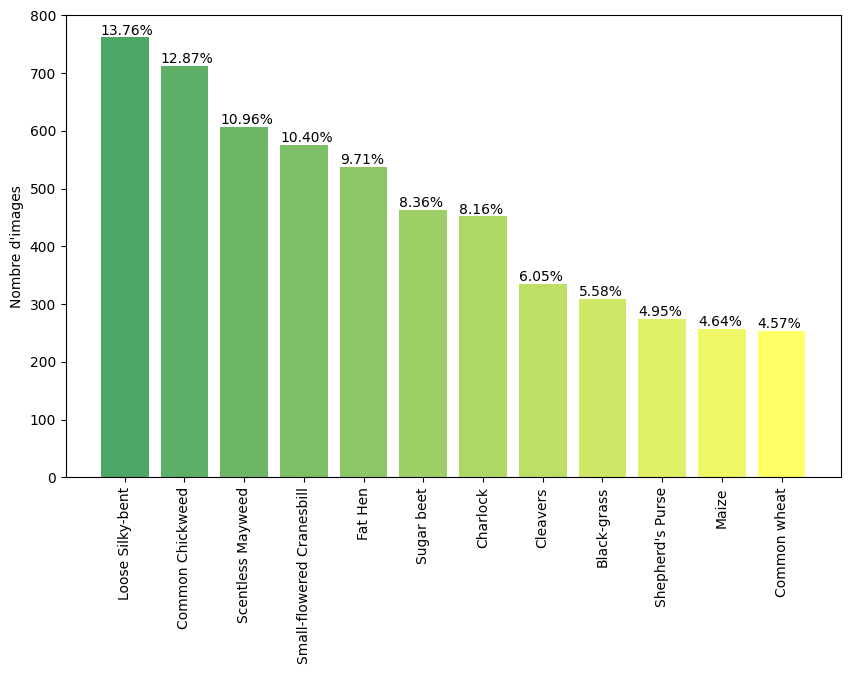

In [16]:
# Visualize class distribution
plot_class_distribution(class_distribution, total_images)

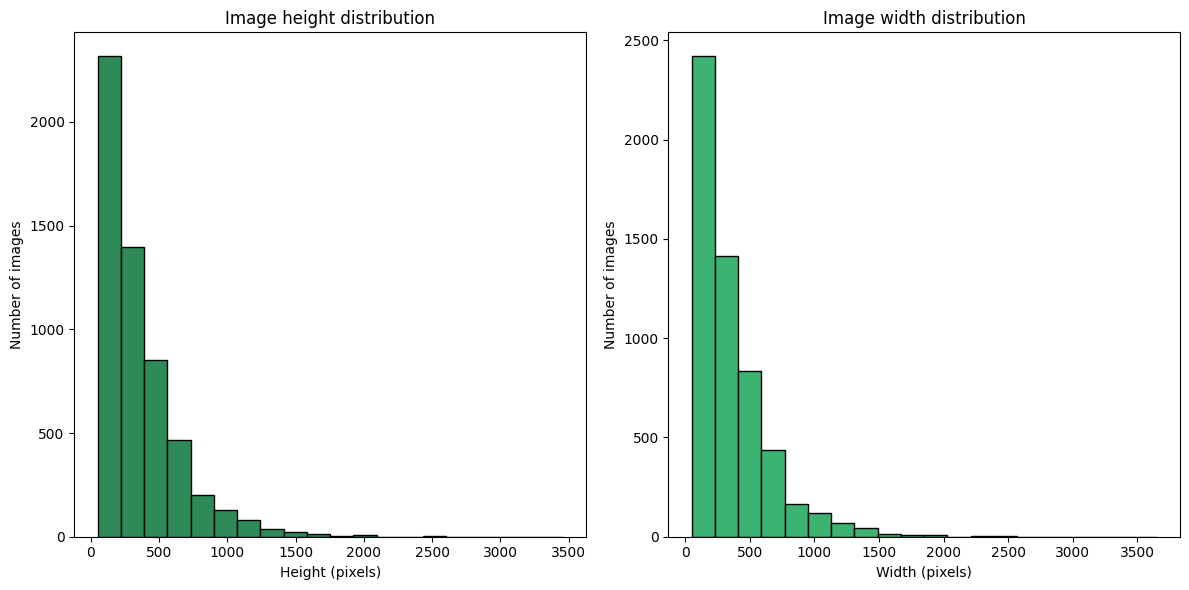

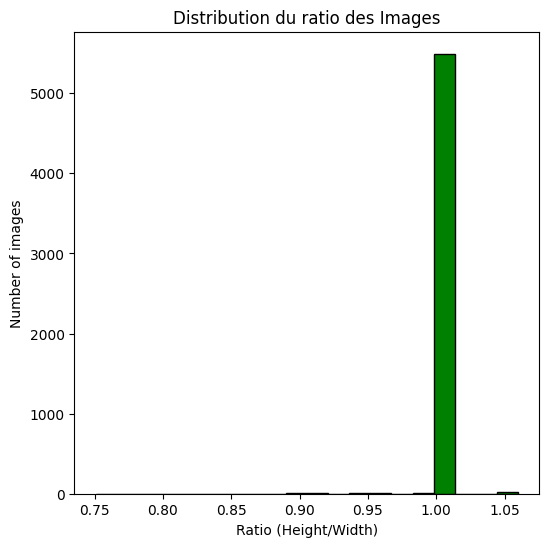

In [17]:
# Plot image dimensions and ratio
plot_image_dimensions(data_df)
plot_image_ratio(data_df)

In [18]:
# Calculate resolution as the product of height and width
data_df['Resolution'] = data_df.apply(lambda row: row['Height'] * row['Width'], axis=1)

# Calculate ratio as the division of height by width
data_df['Ratio'] = data_df.apply(lambda row: row['Height'] / row['Width'], axis=1)

# Count square images
square_images = len(data_df[data_df['Ratio'] == 1.0])

# Calculate the proportion of square images
square_image_proportion = (square_images / total_images) * 100

# Output the proportion of square images
print(f"Proportion of square images: {square_image_proportion:.2f}%")

Proportion of square images: 98.77%


Although 98.77% of images have an aspect ratio equal to 1 (i.e. they are square), some have a ratio approaching but not equal to 1.

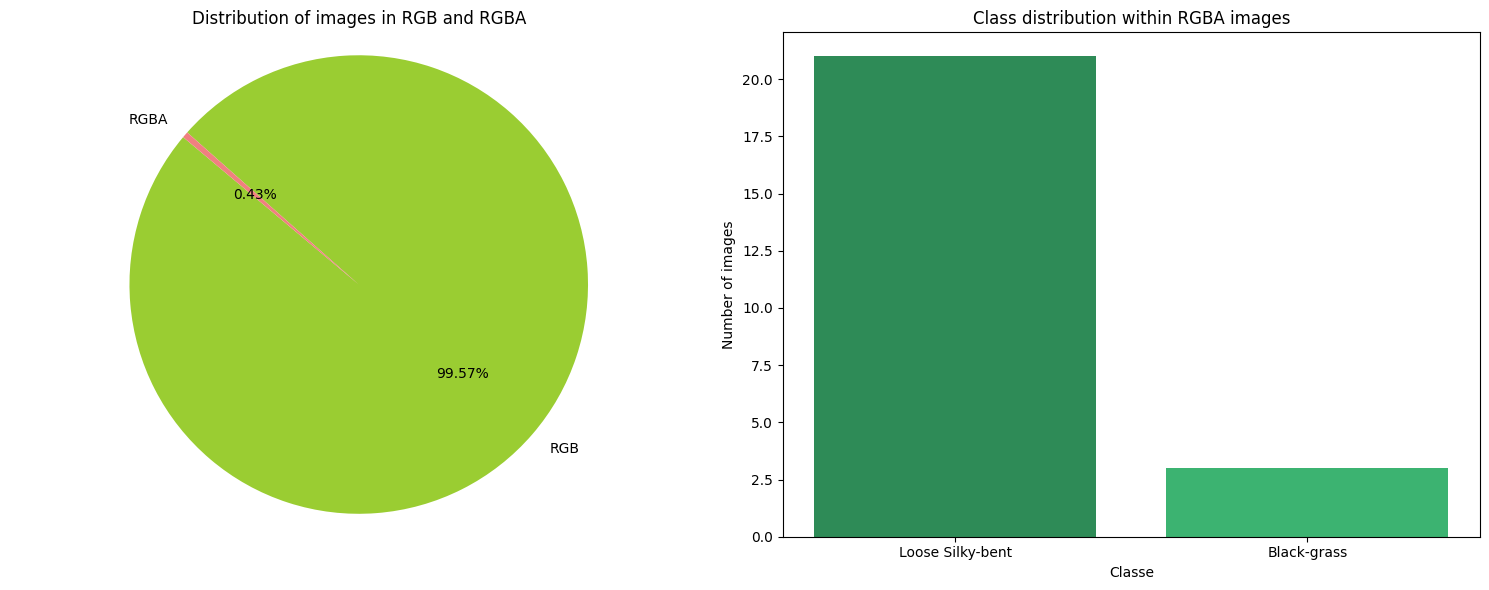

In [23]:
display_image_distribution(data_df)

The vast majority of images are in RGB format. Only a few (0.433%) are in RGBA format.

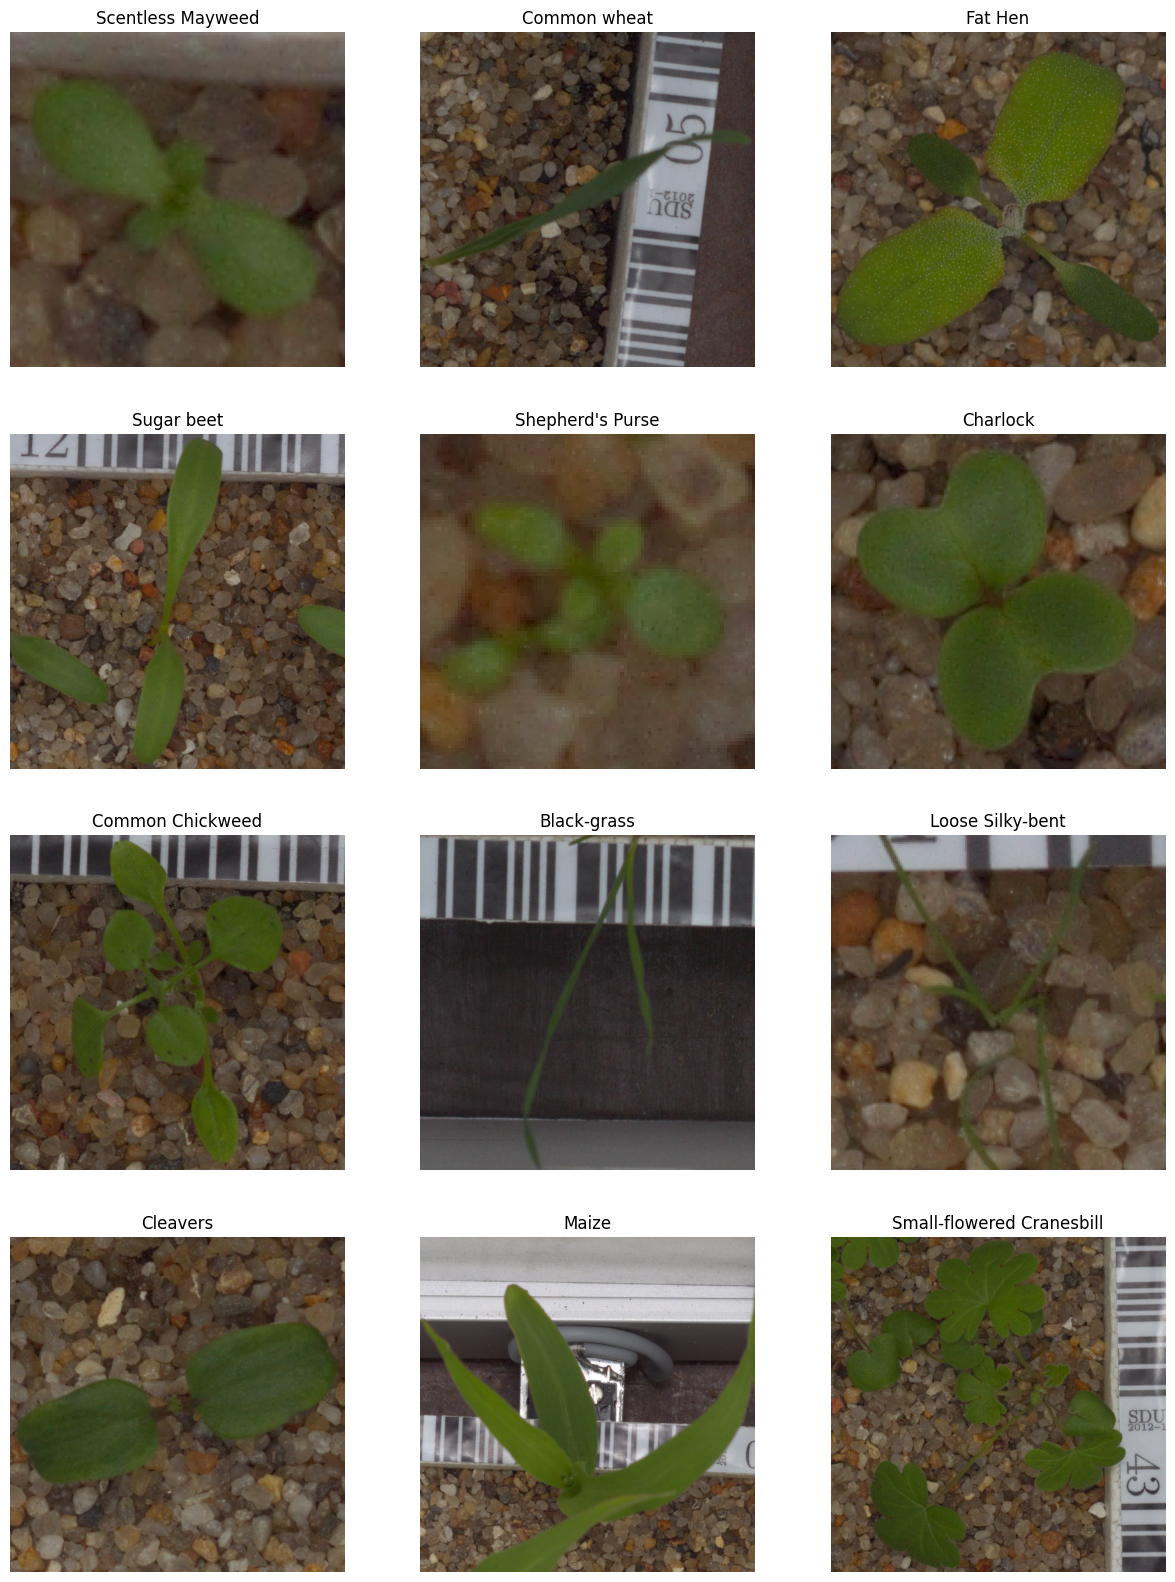

In [19]:
# Plot sample images
plot_sample_images(data_df)

As we randomly visualize our dataset, we can see that although the plants are always centered within the image, they are taken at different stages of growth. Moreover, it would seem that we can detect the growth stage according to the gravel that forms the background of the image (larger or smaller). The image background can also be confusing, as it's not uniform and may contain instruments such as a ruler. Some images are very blurred.

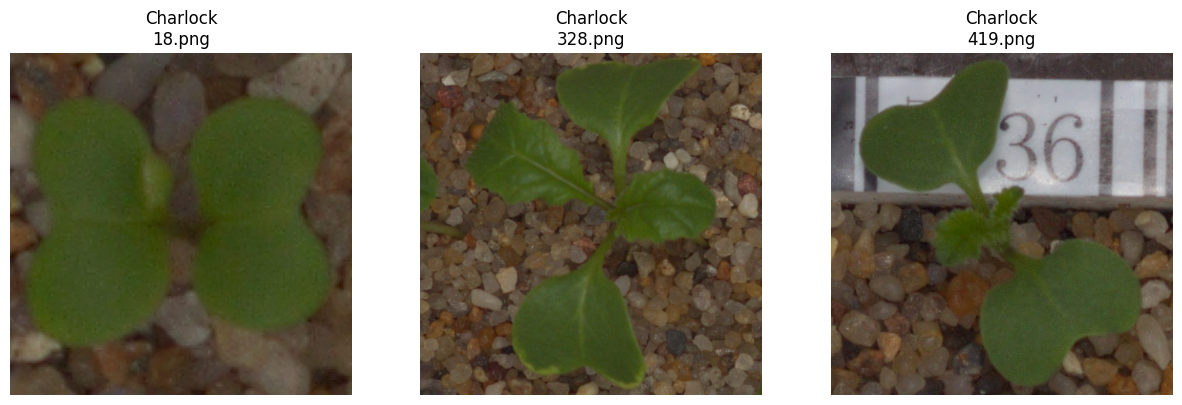

Class Filename                               Path  Height  Width  \
2245  Charlock  328.png  /content/dataset/Charlock/328.png     514    514   
2264  Charlock  419.png  /content/dataset/Charlock/419.png     358    358   
2355  Charlock   18.png   /content/dataset/Charlock/18.png     159    159   

              Shape  Resolution  Ratio  
2245  (514, 514, 3)      264196    1.0  
2264  (358, 358, 3)      128164    1.0  
2355  (159, 159, 3)       25281    1.0

In [20]:
# Plot specific images for the 'Charlock' class
plot_specific_images(data_df, [('18.png', 'Charlock'), ('328.png', 'Charlock'), ('419.png', 'Charlock')])

# Display data of the visually represented 'Charlock' class
display(data_df[(data_df['Class'] == 'Charlock') & ((data_df['Filename'] == '328.png') | (data_df['Filename'] == '419.png') | (data_df['Filename'] == '18.png'))])


The Charlock class shown above is a good representation of the variety at three different stages of growth. Image 328.png is the most advanced Charlock plant, 419.png developed but less than 328.png, while 18.png was taken at the beginning of growth.

- We can't make a link between the numbering in the file names, otherwise the order above in their growth stage would have been 18 < 328 < 419 .
- However, we can see that the image size increases with the growth stage and the blur decreases. I therefore believe that the images have been cropped, thus varying both image size and sharpness.

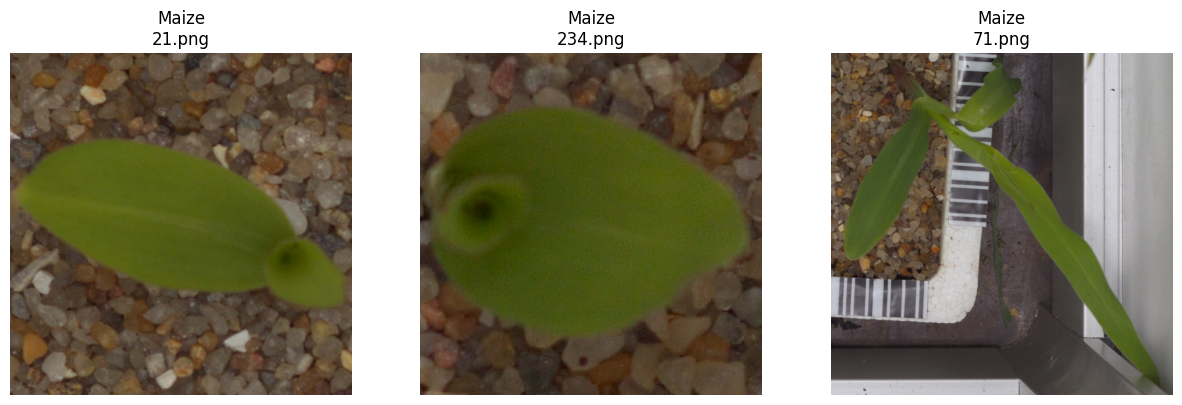

Class Filename                            Path  Height  Width  \
4820  Maize   71.png   /content/dataset/Maize/71.png    1083   1083   
4842  Maize  234.png  /content/dataset/Maize/234.png     248    248   
4851  Maize   21.png   /content/dataset/Maize/21.png     447    447   

                Shape  Resolution  Ratio  
4820  (1083, 1083, 3)     1172889    1.0  
4842    (248, 248, 3)       61504    1.0  
4851    (447, 447, 3)      199809    1.0

In [21]:
# Plot specific images for the 'Maize' class
plot_specific_images(data_df, [('21.png', 'Maize'), ('234.png', 'Maize'), ('71.png', 'Maize')])

# Display data of the visually represented 'Maize' class
display(data_df[(data_df['Class'] == 'Maize') & ((data_df['Filename'] == '21.png') | (data_df['Filename'] == '234.png') | (data_df['Filename'] == '71.png'))])


We find the same thing as the observations made for Charlock

Over the whole dataset, we have detected three images that contain no plants but only the background that can be detected in the other images:

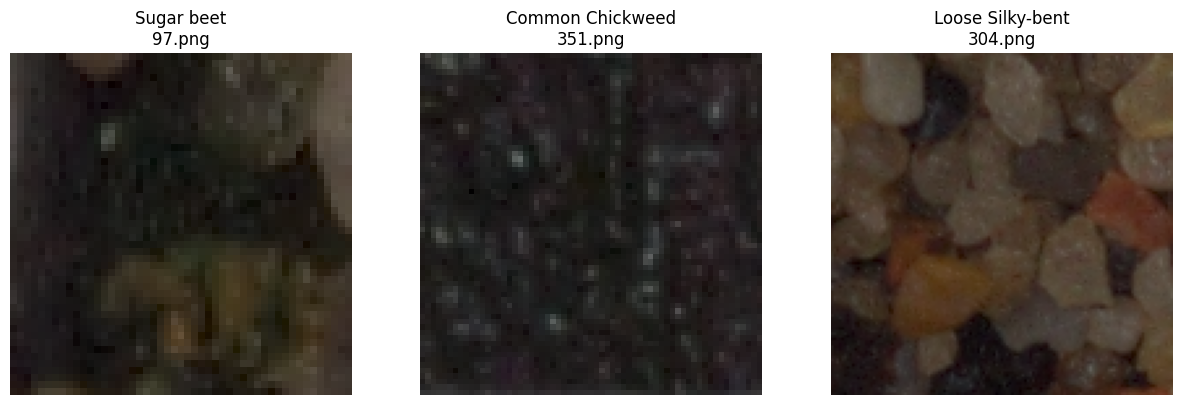

In [25]:
# Plot images that do not contain plants
plot_specific_images(data_df, [('97.png', 'Sugar beet'), ('351.png', 'Common Chickweed'), ('304.png', 'Loose Silky-bent')])


We could either keep them and create a new class "Image without identified species", in which case we'd have to find other similar images and proceed with data augmentation, or simply delete them.